In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import sys
import random

In [ ]:
#二分法(平方根を中間値の繰り返しで求める)
a = 2
LIMIT = 1e-20

def f(x):
    return x * x -a

xp = float(input('what is xp'))
xn = float(input('what is xn'))

while (xp - xn) * (xp - xn) > LIMIT:
    xmid = (xp + xn) / 2
    if f(xmid) > 0:
        xp = xmid
    else:
        xn = xmid
    print('{:.15f}{:.15f}'.format(xn, xp))

In [7]:
#math module
x = float(input('what is value do you want to know? '))
print('sqrt(', x, ')=', math.sqrt(x))

what is value do you want to know? 7
sqrt( 7.0 )= 2.6457513110645907


In [6]:
#関数を解く
var('x')
equation = Eq(x**3 + 2 * x**2 -5 * x -6, 0)
answer = solve(equation)
print(answer)

[-3, -1, 2]


In [4]:
#桁落ち処理
x = 1e15
res1 = math.sqrt(x + 1) - math.sqrt(x) #normal
res2 = 1 / (math.sqrt(x + 1) + math.sqrt(x)) #有理化
print(res1)
print(res2)
print()

x = 1e16
res1 = math.sqrt(x + 1) - math.sqrt(x)
res2 = 1 / (math.sqrt(x + 1) + math.sqrt(x))
print(res1)
print(res2)

1.862645149230957e-08
1.5811388300841893e-08

0.0
5e-09


In [5]:
#丸め誤差
print(0.1)

x= 0.0
for i in range (100000):
    x = x + 0.1
print(x)

0.1
10000.000000018848


In [8]:
#情報落ち誤差
x = 1e10
y = 1e-8
temp = 0.0
#yをｘに加える
for i in range(1000000):
     x = x + y
print(x)
#先にｙを加える
for i in range(100000):
    temp += y
#加えた結果をｘに加える
x = 1e10
x += temp
print(x)

10000000000.0
10000000000.001


In [11]:
#decimal
from decimal import *
print(Decimal('0.1'))

x = Decimal('0.0')
for i in range(100000):
    x = x + Decimal('0.1')
    
print(x)

0.1
10000.0


In [12]:
#fraction 分数計算
from fractions import Fraction
print(Fraction(5, 10), Fraction(3, 15))
print(Fraction(1, 3) + Fraction(1, 7))
print(Fraction(5, 3), Fraction(6, 7))

1/2 1/5
10/21
5/3 6/7


In [ ]:
#dv/dt = g
G = 9.80665

t = 0.0
h = 0.01

#coefficient
v = float(input('what is v0?'))
x = float(input('what is x0?'))
print('{:.7f}{:.7f}{:.7f}'.format(t, x, v))

#caluclate
while x >= 0:
    t += h
    v += G * h
    x -= v * h
    print('{:.7f}{:.7f}{:.7f}'.format(t, x, v))

what is v0?-100
what is x0?100


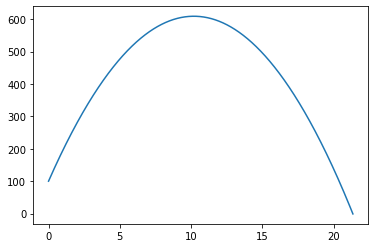

In [2]:
#graph
#dv/dt = g
G = 9.80665

t = 0.0
h = 0.01

#coefficient
v = float(input('what is v0?'))
x = float(input('what is x0?'))
#print('{:.7f}{:.7f}{:.7f}'.format(t, x, v))

#data
tlist = [t]
xlist = [x]

#caluclate
while x >= 0:
    t += h
    v += G * h
    x -= v * h
   # print('{:.7f}{:.7f}{:.7f}'.format(t, x, v))
    tlist.append(t)
    xlist.append(x)
    
#show 
plt.plot(tlist, xlist)
plt.show()

what is v0?0
what is x0?100
what is tf?1


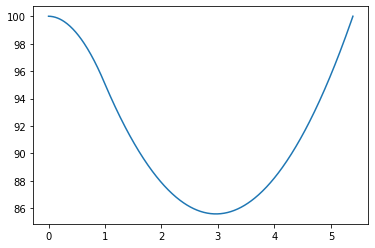

In [8]:
#lander
F  = 1.5
G = 9.80665

#下請け
def retrofire(t, tf):
    if t >= tf:
        return -F * G
    else:
        return 0.0; #逆噴射なし
        
#main
t = 0.0
h = 0.01

#coefficient
v = float(input('what is v0?'))
x0 = float(input('what is x0?'))
tf = float(input('what is tf?'))
x = x0
#print('{:.7f}{:.7f}{:.7f}'.format(t, x, v))

#data
tlist = [t]
xlist = [x]

#caliculate
while (x > 0) and (x <= x0):
    t += h
    v += (G + retrofire(t, tf)) * h
    x -= v * h
    #print('{:.7f}{:.7f}{:.7f}'.format(t, x, v))
    tlist.append(t)
    xlist.append(x)
    
#show
plt.plot(tlist, xlist)
plt.show()

what is v0x?-2
what is v0y?1
what is x?2
what is y?2


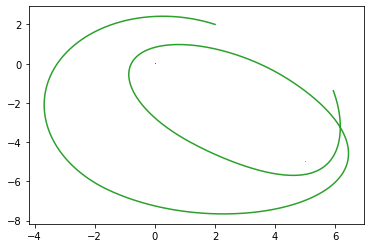

In [12]:
#electric fild
#coefficient
Q = ((0.0, 0.0), 10.0), ((5.0, -5.0), 5.0) #電荷の位置と値
TIMELIMIT = 20.0 #打ち切り
RIMIT = 0.1
H = 0.01

#main
t = 0.0
#電荷の位置
for qi in Q:
    plt.plot(qi[0][0], qi[0][1], ",")
    
#coefficient
vx = float(input('what is v0x?'))
vy = float(input('what is v0y?'))
x = float(input('what is x?'))
y = float(input('what is y?'))

#print('{:.7f}{:.7f}{:.7f}{:.7f}{:.7f}'.format(t, x, y, vx, vy))

#data
xlist = [x]
ylist = [y]

#caluclate
while t < TIMELIMIT:
    t = t + H
    rmin=float('inf') #距離の最小値を初期化
    for qi in Q:
        rx = qi[0][0] -x #距離rx
        ry = qi[0][1] -y
        r = math.sqrt(rx * rx + ry * ry)
        if r < rmin:
            rmin = r #距離の最小値を更新
            vx += (rx / r / r / r * qi[1]) * H #vxの計算
            vy += (ry / r/ r / r * qi[1]) * H
            x += vx * H #位置xの計算
            y += vy * H
           #print('{:.7f}{:.7f}{:.7f}{:.7f}{:.7f}'.format(t, x, y, vx, vy))
            xlist.append(x)
            ylist.append(y)
            if rmin < RIMIT:
                break
#show
plt.plot(xlist, ylist)
plt.show()            

In [2]:
#ガウスの消去法
N = 9  # n元連立方程式を解く
r = [[4, -1, 0, -1, 0, 0, 0, 0, 0, 0], [-1, 4, -1, 0, -1, 0, 0, 0, 0, 0], 
    [0, -1, 4, 0, 0, -1, 0, 0, 0, 0.25], [-1, 0, 0, 4, -1, 0, -1, 0, 0, 0], 
    [0, -1, 0, -1, 4, -1, 0, -1, 0, 0], [0, 0, -1, 0, -1, 4, 0, 0, -1, 0.5], 
    [0, 0, 0, -1, 0, 0, 4, -1, 0, 0.25], [0, 0, 0, 0, -1, 0, -1, 4, -1, 0.5], 
    [0, 0, 0, 0, 0, -1, 0, -1, 4, 1.5]]  # 拡大係数行列

def forward(r):
    for i in range(0, N):
        rii = r[i][i]
        for j in range(i, N + 1):
            r[i][j] /= rii
        for k in range(i + 1, N):
            rki = r[k][i]
            for j in range(i, N + 1):
                r[k][j] -= r[i][j] * rki
                
def backward(r, x):
    for i in range(N-1, -1, -1):
        sum = 0.0
        for j in range(i + 1, N):
            sum += r[i][j] * x[j]
        x[i] = r[i][N] - sum
        
x = [0] * N
forward(r)
backward(r, x)
print(r)
print(x)

[[1.0, -0.25, 0.0, -0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, -0.26666666666666666, -0.06666666666666667, -0.26666666666666666, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, -0.017857142857142856, -0.07142857142857142, -0.26785714285714285, 0.0, 0.0, 0.0, 0.06696428571428571], [0.0, 0.0, 0.0, 1.0, -0.28708133971291866, -0.004784688995215311, -0.2679425837320574, 0.0, 0.0, 0.0011961722488038277], [0.0, 0.0, 0.0, 0.0, 1.0, -0.31601123595505615, -0.08426966292134831, -0.29353932584269665, 0.0, 0.0056179775280898875], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, -0.028157349896480333, -0.09316770186335405, -0.294824016563147, 0.16894409937888202], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, -0.2950379973178364, -0.007599463567277602, 0.07258605274921769], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, -0.32835820895522394, 0.1902985074626866], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.5625]]
[0.0625, 0.125, 0.1875, 0.125, 0.25000000000000006, 0.37500000000000006, 0.1875, 0.37500000000000006, 0.5625]


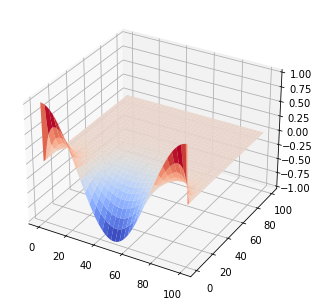

In [2]:
#ラプラス方程式の反復解法
#coefficient
LIMIT = 1000
N = 101
M = 101

def iteration(u):
    u_next = [[0 for i in range(N)] for j in range(M)]
    for i in range(1, N -1):
        for j in range(1, M -1):
            u_next[i][j] = (u[i][j - 1] + u[i-1][j] + u[i+1][j] + u[i][j+1]) / 4
    
    for i in range(1, N-1):
        for j in range(1, M-1):
            u[i][j] = u_next[i][j]
            
#main
u = [[0 for i in range(N)] for j in range(M)]
for i in range(M):
    u[0][i] = math.cos(2 * math.pi * i / (M-1))
    
#roop
for i in range(LIMIT):
    iteration(u)
#print(u)

x = np.arange(0, N)
y = np.arange(0, M)
X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = Axes3D(fig)
U = np.array(u)
#ax.plot_wireframe(X, Y, U)
ax.plot_surface(X, Y, U, cmap = cm.coolwarm)
plt.show()

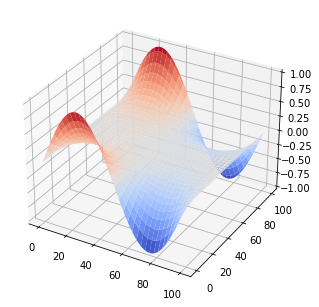

In [13]:
#ラプラス方程式の反復解法(2)
#coefficient
LIMIT = 1000
N = 101
M = 101

def iteration(u):
    u_next = [[0 for i in range(N)] for j in range(M)]
    for i in range(1, N -1):
        for j in range(1, M -1):
            u_next[i][j] = (u[i][j - 1] + u[i-1][j] + u[i+1][j] + u[i][j+1]) / 4
    
    for i in range(1, N-1):
        for j in range(1, M-1):
            u[i][j] = u_next[i][j]
            
#main
u = [[0 for i in range(N)] for j in range(M)]
for i in range(M):
    u[0][i] = math.sin(2 * math.pi * i / (M-1))
    u[M - 1][i] = math.sin(2 * math.pi * i / (M-1))
    
#roop
for i in range(LIMIT):
    iteration(u)
#print(u)

x = np.arange(0, N)
y = np.arange(0, M)
X, Y = np.meshgrid(x, y)
fig = plt.figure()
ax = Axes3D(fig)
U = np.array(u)
#ax.plot_wireframe(X, Y, U)
ax.plot_surface(X, Y, U, cmap = cm.coolwarm)
plt.show()

In [ ]:
#セルオートマトン
N = 256
R = 8
MAXT = 256

def setrule(rule, ruleno):
    for i in range(0, R):
        rule[i] = ruleno % 2
        ruleno = ruleno // 2
    for i in range(R- 1, -1, -1):
        print(rule[i])
        
def initca(ca):
    line = input('what is ca value?')
    print()
    for no in range(len(line)):
        ca[no] = int(line[no])
        
def putca(ca):
    for no in range(N - 1, -1, -1):
        print("{:1d}".format(ca[no]), end="")
    #print()
    
def nextt(ca, rule):
    nextca = [0 for i in range(N)]
    for i in range(1, N-1):
        nextca[i] = rule[ca[i + 1] * 4 + ca[i] * 2 + ca[i - 1]]
    for i in range(N):
        ca[i] = nextca[i]
        
outputdata = [[0 for i in range(N)] for j in range(MAXT + 1)]

            
rule = [0 for i in range(R)]
ruleno = int(input("what is rule number?"))
#print()
if ruleno < 0 or ruleno > 255:
    print("Number error(", ruleno, ")")
    sys.exit()
setrule(rule, ruleno)
ca = [0 for i in range(N)]
initca(ca)
putca(ca)
for i in range(N):
    outputdata[0][1] = ca[i]
for t in range(MAXT):
    nextt(ca, rule)
    putca(ca)
    for i in range(N):
        outputdata[t + 1][i] = ca[i]
        
plt.imshow(outputdata)
plt.show()

In [ ]:
#ライフゲーム
N = 500
MAXT = 1000

def initworld(world):
    chrworld = sys.stdin.readlines()
    for no, line in enumerate(chrworld):
        line = line.rstrip()
        print(line)
        for i in range(len(line)):
            world[no][i] = int(line[i])
            
def nextt(world):
    nextworld = [[0 for i in range(N)] for j in range(N)]
    for i in range(1, N - 1):
        for j in range(1, N - 1):
            nextworld[i][j] = calcnext(world, i, j)
    for i in range(N):
        for j in range(N):
            world[i][j] = nextworld[i][j]
            
def calcnext(world, i ,j):
    no_of_one = 0
    for x in range(i - 1, i + 2):
        for y in range(j - 1, j + 2):
            no_of_one += world[x][y]
    no_of_one -=world[i][j]
    
    if no_of_one == 3:
        return 1
    elif no_of_one == 2:
        return world[i][j]
    return 0

world = [[0 for i in range(N)] for j in range(N)]
initworld(world)
#print("t=0")

w = plt.imshow(world, interpolation="nearest")
plt.pause(0.01)

for t in range(1, MAXT):
    nextt(world)
    #print("t=", t)
    w.set_data(world)
    
    plt.pause(0.01)
plt.show()    

In [ ]:
#疑似乱数生成
LIMIT = 50
r = int(input("number?"))

for i in range(LIMIT):
    r = (166455 * r + 1013904223) % (2 ** 32)
    print(r)

In [4]:
#メルセンヌツイスター
import random
seed = float(input("seed"))
random.seed(seed)
for i in range(20):
    print(random.random())

seed4
0.23604808973743452
0.1031660342307158
0.396058242610681
0.15497227080241027
0.06651509567958991
0.40159101448507484
0.9179550430877189
0.8004523514958085
0.7651626025054384
0.22192817569031764
0.5366800081748135
0.2766826434414502
0.1726645292853689
0.10618329243153013
0.2144004325789165
0.9274756314280604
0.8289200487784194
0.8066523467023234
0.8004478385429662
0.19343561801924003


In [6]:
#台形円
SEED = 1
R = 10
def fx(x):
    return math.sqrt(1.0 - x * x)

n = int(input("cut N"))
h = 1.0 / n
integral = fx(0.0) / 2.0
for i in range(1, n):
    integral += fx(float(i) / n)
integral += fx(1.0) / 2.0
integral *= h
print("積分値I" , integral, "  4I ", 4 * integral)

cut N10000
積分値I 0.7853978694028302   4I  3.1415914776113207


In [4]:
#乱数円
SEED = 1
R = 10
n = int(input('n'))
random.seed(SEED)

for r in range(R):
    integral = 0
    for i in range(n):
        x = random.random()
        y = random.random()
        if (x * x + y * y) <= 1:
            integral +=1
            
    res = float(integral) / n
    print("積分値 I", res, "   4I", 4 * res)

n1000000
積分値 I 0.785345    4I 3.14138
積分値 I 0.785678    4I 3.142712
積分値 I 0.785875    4I 3.1435
積分値 I 0.785336    4I 3.141344
積分値 I 0.785284    4I 3.141136
積分値 I 0.785569    4I 3.142276
積分値 I 0.784641    4I 3.138564
積分値 I 0.785146    4I 3.140584
積分値 I 0.78519    4I 3.14076
積分値 I 0.784468    4I 3.137872


In [ ]:
#ナップザック問題
weights = [87, 66, 70, 25, 33, 24, 89, 63, 54]
values = [96, 55, 21, 58, 41, 81, 8, 99, 59, 62]
N = len(weights)
SEED = 32767
R = 10

def solvekp(p, weightlimit, nlimit, N):
    maxvalue = 0
    mweight = 0
    bestp = [0 for i in range(N)]
    for i in range(nlimit):
        rsetp(p, N)
        weight = calcw(p, N)
        if weight <= weightlimit:
            value = calcval(p, N)
        else:
            value = 0
        if value > maxvalue:
            mweight = weight
            for j in range(N):
                bestp[j] = p[j]
    print(maxvalue, " ", mweight)
    print(bestp)
    
def calcw(p, N):
    w = 0 
    for i in range(N):
        w += weights[i] * p[i]
    return w

def calcval(p, N):
    v = 0
    for i in range(N):
        v += values[i] * p[i]
    return v

def rsetp(p, N):
    for i in range(N):
        p[i] = int(random.random() * 2)
        
p = [0 for i in range(N)]
weightlimit = int(input("limit number"))
nlimit = int(input("n"))
random.seed(SEED)

for i in range(R):
    solvekp(p, weightlimit, nlimit, N)        

n100
seed1


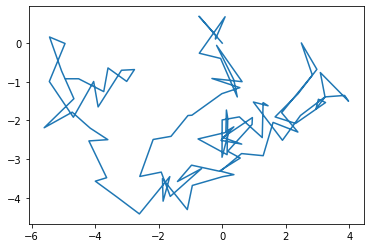

In [3]:
#ランダムウォーク
n = int(input("n"))
seed = int(input("seed"))
random.seed(seed)

x = 0.0
y = 0.0
xlist = [x]
ylist = [x]
for i in range(n):
    x += (random.random() - 0.5) * 2
    y += (random.random() - 0.5) * 2
    #print(("{:.7f}{:.7f}".format(x, y)))
    xlist.append(x)
    ylist.append(y)
    
plt.plot(xlist, ylist)
plt.show()